In [1]:
#import sys
#!{sys.executable} -m pip install pyxlsb


import pandas as pd
from pyxlsb import open_workbook as open_xlsb

df = []

with open_xlsb('/Users/erinberardi/Downloads/Voorlopige-labels-december-2019.xlsb') as wb:
    with wb.get_sheet(4) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

df = pd.DataFrame(df[1:], columns=df[0])



#df = pd.read_excel('/Users/erinberardi/Downloads/Voorlopige-labels-december-2019.xlsb', engine='pyxlsb')

In [2]:
df[df['VOORL_BEREKEND'].isnull()]

POSTCODE_WONING  HUISNUMMER_WONING HUISNUMMER_TOEV_WONING  \
40               1059BG               14.0                      H   
164              1059BJ               48.0                      H   
178              1059BJ               52.0                   None   
330              1025BE                2.0                   None   
331              1025BE                3.0                   None   
...                 ...                ...                    ...   
1048470          1981LT                9.0                   None   
1048561          1991NN              197.0                      A   
1048568          1981AG               16.0                   None   
1048571          1971GG              791.0                   None   
1048572          1971GG              793.0                   None   

         BOUWJAAR_WONING WONING_TYPE VOORL_BEREKEND  
40                1930.0  Niet wonen           None  
164               1929.0  Niet wonen           None  
178               1929.0  Niet wonen           None  
330               1969.0  Niet wonen           None  
331               1967.0  Niet wonen           None  
...                  ...         ...            ...  
1048470           2002.0  Niet wonen           None  
1048561           1993.0  Niet wonen           None  
1048568           1968.0  Niet wonen           None  
1048571           1953.0  Niet wonen           None  
1048572           1953.0  Niet wonen           None  

[93222 rows x 6 columns]

In [3]:
df.drop(columns = ['HUISNUMMER_WONING','HUISNUMMER_TOEV_WONING','BOUWJAAR_WONING','WONING_TYPE'], axis=1, inplace=True)
df.head()

POSTCODE_WONING VOORL_BEREKEND
0          1059BG              G
1          1059BG              G
2          1059BG              G
3          1059BG              G
4          1059BA              G

In [4]:
df.loc[:,'VOORL_BEREKEND'] = df.loc[:, 'VOORL_BEREKEND'].astype(str)

In [5]:
df['VOORL_BEREKEND'].dtype

dtype('O')

In [6]:
 df[df['VOORL_BEREKEND'].isnull()]

Empty DataFrame
Columns: [POSTCODE_WONING, VOORL_BEREKEND]
Index: []

In [7]:
df = df.sort_values('VOORL_BEREKEND',ascending=True)
df

POSTCODE_WONING VOORL_BEREKEND
816589           1628ZH              A
232284           1068GR              A
618492           2144KM              A
232282           1068GR              A
232281           1068GR              A
...                 ...            ...
190722           1017CB           None
190723           1017DR           None
190724           1016CJ           None
190710           1011TD           None
1048572          1971GG           None

[1048573 rows x 2 columns]

Text(0, 0.5, 'Number of Buildings')

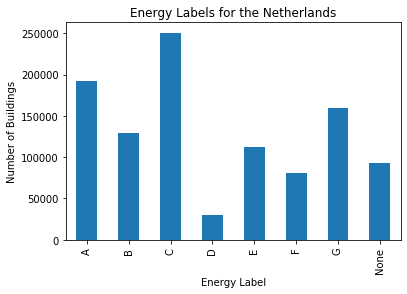

In [294]:
#graph of Energy labels for Netherlands

# df['VOORL_BEREKEND'].value_counts().sort_index().plot.bar()
# plt.title ('Energy Labels for the Netherlands')
# plt.xlabel ('Energy Label')
# plt.ylabel ('Number of Buildings')

In [8]:
import re
import matplotlib.pyplot as plt

#df.loc[df['A'] == 'foo']
#df.loc[df['column_name'].isin(some_values)]
#col_one_list = df['one'].tolist()
#df.loc[df['POSTCODE_WONING'].(pattern)]
#AMS_postcodes = re.findall(pattern,df['POSTCODE_WONING']).index


pattern = ('1[01]\d{2}\w{2}')

AMS_postcodes_list = df['POSTCODE_WONING'].tolist()

#AMS_postcodes = re.findall(pattern,AMS_postcodes_list)

AMS_postcodes_list
#df1 = df.drop(AMS_postcodes , inplace=True)

len(AMS_postcodes_list)


1048573

Text(0, 0.5, 'Number of Buildings')

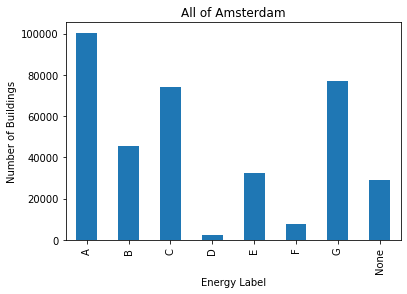

In [26]:
# Energy labels for Amsterdam City all 8 Neighborhoods


AMS_pc = df[df['POSTCODE_WONING'].str.match('1[01]\d{2}\w{2}')]
#AMS_pc
AMS_pc['VOORL_BEREKEND'].value_counts().sort_index().plot.bar()
plt.title ('All of Amsterdam')
plt.xlabel ('Energy Label')
plt.ylabel ('Number of Buildings')


In [37]:
#dividing into neighborhoods by postcode
# centrum_pattern = ('101\d\w{2}')]
# westpoort_pattern = ('104\d\w{2}')
# west_pattern = ('105\d\w{2}')
# nieuw_west_pattern = ('106\d\w{2}')
# zuid_pattern = ('107\d\w{2}|108[0-3]\w{2}')
# oost_pattern = ('108[6-9]\w{2}|109\d\w{2}')
# noord_pattern = ('10[23]\d\w{2}')
# zuidoost_pattern = ('11\d{2}\w{2}')

# creating dataframes for each neighborhood
centrum = df[df['POSTCODE_WONING'].str.match('101\d\w{2}')]
westpoort = df[df['POSTCODE_WONING'].str.match('104\d\w{2}')]
west = df[df['POSTCODE_WONING'].str.match('105\d\w{2}')]
nieuw_west = df[df['POSTCODE_WONING'].str.match('106\d\w{2}')]
zuid = df[df['POSTCODE_WONING'].str.match('107\d\w{2}|108[0-3]\w{2}')]
oost = df[df['POSTCODE_WONING'].str.match('108[6-9]\w{2}|109\d\w{2}')]
noord = df[df['POSTCODE_WONING'].str.match('10[23]\d\w{2}')]
zuidoost = df[df['POSTCODE_WONING'].str.match('11\d{2}\w{2}')]


Text(0, 0.5, 'Number of Buildings')

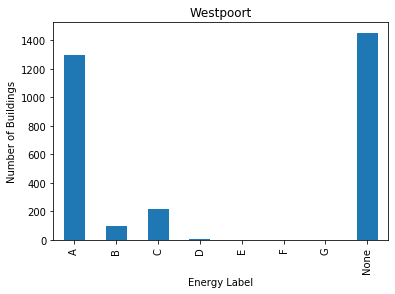

In [28]:
#Energy Labels in Westpoort

westpoort['VOORL_BEREKEND'].value_counts().sort_index().plot.bar()
plt.title ('Westpoort')
plt.xlabel ('Energy Label')
plt.ylabel ('Number of Buildings')

Text(0.5, 1.0, 'West')

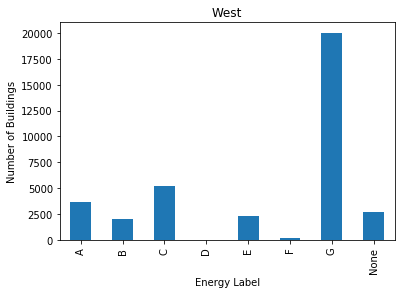

In [29]:
#Energy Labels in West
west['VOORL_BEREKEND'].value_counts().sort_index().plot.bar()
plt.xlabel ('Energy Label')
plt.ylabel ('Number of Buildings')
plt.title ('West')

Text(0.5, 1.0, 'Nieuw West')

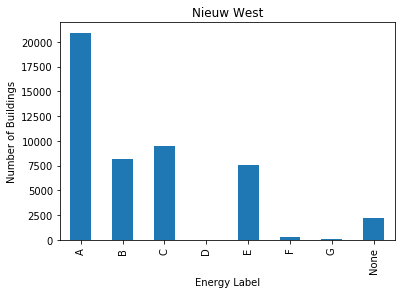

In [30]:
#Energy Labels in Nieuw West
nieuw_west['VOORL_BEREKEND'].value_counts().sort_index().plot.bar()
plt.xlabel ('Energy Label')
plt.ylabel ('Number of Buildings')
plt.title ('Nieuw West')

Text(0.5, 1.0, 'Zuid')

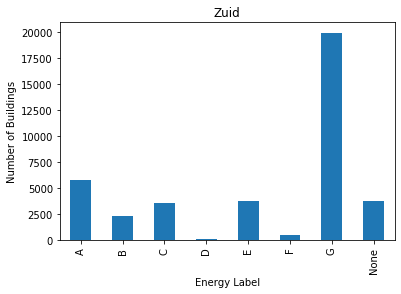

In [31]:
#Energy Labels in Zuid
zuid['VOORL_BEREKEND'].value_counts().sort_index().plot.bar()
plt.xlabel ('Energy Label')
plt.ylabel ('Number of Buildings')
plt.title ('Zuid')

Text(0.5, 1.0, 'Oost')

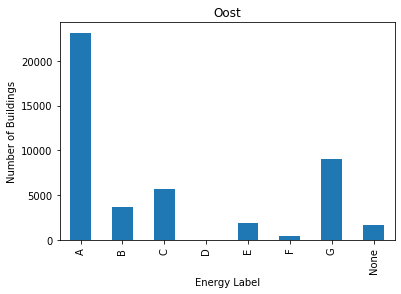

In [32]:
#Energy Labels in Oost
oost['VOORL_BEREKEND'].value_counts().sort_index().plot.bar()
plt.xlabel ('Energy Label')
plt.ylabel ('Number of Buildings')
plt.title ('Oost')

Text(0.5, 1.0, 'Noord')

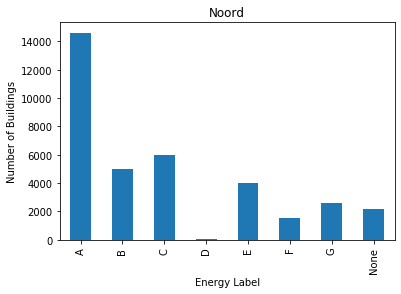

In [33]:
#Energy Labels in Noord
noord['VOORL_BEREKEND'].value_counts().sort_index().plot.bar()
plt.xlabel ('Energy Label')
plt.ylabel ('Number of Buildings')
plt.title ('Noord')

Text(0.5, 1.0, 'Zuidoost')

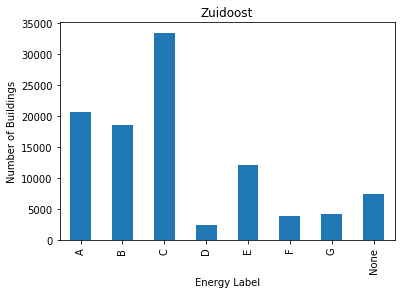

In [34]:
#Energy Labels in Zuidoost
zuidoost['VOORL_BEREKEND'].value_counts().sort_index().plot.bar()
plt.xlabel ('Energy Label')
plt.ylabel ('Number of Buildings')
plt.title ('Zuidoost')

Text(0.5, 1.0, 'Centrum')

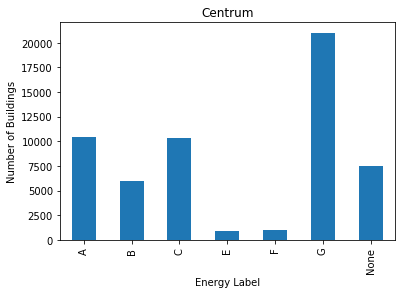

In [35]:
#Energy Labels in Centrum
centrum['VOORL_BEREKEND'].value_counts().sort_index().plot.bar()
plt.xlabel ('Energy Label')
plt.ylabel ('Number of Buildings')
plt.title ('Centrum')

In [36]:
#replace None with H

df['VOORL_BEREKEND'] = df['VOORL_BEREKEND'].replace(['None'], 'H')

df

POSTCODE_WONING VOORL_BEREKEND
816589           1628ZH              A
232284           1068GR              A
618492           2144KM              A
232282           1068GR              A
232281           1068GR              A
...                 ...            ...
190722           1017CB              H
190723           1017DR              H
190724           1016CJ              H
190710           1011TD              H
1048572          1971GG              H

[1048573 rows x 2 columns]

In [58]:
#df1 = df['VOORL_BEREKEND'] = [ chr(int(x)) + 64 for x in df['VOORL_BEREKEND']]

#df1
df




POSTCODE_WONING VOORL_BEREKEND
816589           1628ZH              A
232284           1068GR              A
618492           2144KM              A
232282           1068GR              A
232281           1068GR              A
...                 ...            ...
190722           1017CB              H
190723           1017DR              H
190724           1016CJ              H
190710           1011TD              H
1048572          1971GG              H

[1048573 rows x 2 columns]

In [59]:
df['VOORL_BEREKEND'] = df['VOORL_BEREKEND'].replace(['H'], 'None')

df

POSTCODE_WONING VOORL_BEREKEND
816589           1628ZH              A
232284           1068GR              A
618492           2144KM              A
232282           1068GR              A
232281           1068GR              A
...                 ...            ...
190722           1017CB           None
190723           1017DR           None
190724           1016CJ           None
190710           1011TD           None
1048572          1971GG           None

[1048573 rows x 2 columns]

In [53]:

centrum['VOORL_BEREKEND'].value_counts().sort_index().plot.bar()
plt.xlabel ('Energy Label')
plt.ylabel ('Number of Buildings')

'A'

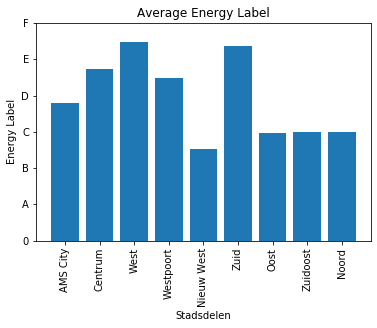

In [16]:

import numpy as np
avg_dict = {'AMS City':3.8,'Centrum':4.74,'West':5.48,'Westpoort':4.49,'Nieuw West':2.53,'Zuid':5.37,'Oost':2.98,'Zuidoost':3,'Noord':2.99}

plt.bar(range(len(avg_dict)), avg_dict.values(), align='center')
plt.xticks(range(len(avg_dict)), list(avg_dict.keys()))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 7, 1), ['0','A','B','C','D','E','F'])

#yticks(np.arange(3), ['Tom', 'Dick', 'Sue'])  # Set text labels.

#Axes.set_yticklabels('0','A','B','C','D','E','F')
#.set_yticklabels('0','A','B','C','D','E','F')
plt.ylabel ('Energy Label')
plt.xlabel ('Stadsdelen')
plt.title ('Average Energy Label')
plt.show()
#plt.bar['Nieuw West', 'Oost','Zuidoost','Noord'].set_color('g')

In [11]:
#Replace Letters with numbers

df['VOORL_BEREKEND'] = [ ord(x) - 64 for x in df['VOORL_BEREKEND']]
NL_avg = df['VOORL_BEREKEND'].mean()

NL_avg



4.038170923722049

In [38]:
AMS_pc['VOORL_BEREKEND'] = AMS_pc['VOORL_BEREKEND'].replace(['None'], 'H')

#AMS_pc
AMS_pc['VOORL_BEREKEND'] = [ ord(x) - 64 for x in AMS_pc['VOORL_BEREKEND']]
AMS_avg = AMS_pc['VOORL_BEREKEND'].mean()

AMS_avg

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


3.8037954073020748

In [44]:

#centrum['VOORL_BEREKEND'] = centrum['VOORL_BEREKEND'].replace(['None'], 'H')
#centrum['VOORL_BEREKEND'] = [ ord(x) - 64 for x in centrum['VOORL_BEREKEND']]
centrum_avg = centrum['VOORL_BEREKEND'].mean()

centrum_avg

4.744625771807385

In [41]:
#west['VOORL_BEREKEND'] = west['VOORL_BEREKEND'].replace(['None'], 'H')
west['VOORL_BEREKEND'] = [ ord(x) - 64 for x in west['VOORL_BEREKEND']]
west_avg = west['VOORL_BEREKEND'].mean()

west_avg

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


5.477917981072555

In [42]:
#westpoort['VOORL_BEREKEND'] = westpoort['VOORL_BEREKEND'].replace(['None'], 'H')
westpoort['VOORL_BEREKEND'] = [ ord(x) - 64 for x in westpoort['VOORL_BEREKEND']]
westpoort_avg = westpoort['VOORL_BEREKEND'].mean()

westpoort_avg

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4.499185402411209

In [47]:
nieuw_west['VOORL_BEREKEND'] = [ ord(x) - 64 for x in nieuw_west['VOORL_BEREKEND']]
nieuw_west_avg = nieuw_west['VOORL_BEREKEND'].mean()
nieuw_west_avg

2.532713165531293

In [48]:
zuid['VOORL_BEREKEND'] = [ ord(x) - 64 for x in zuid['VOORL_BEREKEND']]
zuid_avg = zuid['VOORL_BEREKEND'].mean()
zuid_avg

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5.372442779015596

In [49]:
zuidoost['VOORL_BEREKEND'] = [ ord(x) - 64 for x in zuidoost['VOORL_BEREKEND']]
zuidoost_avg = zuidoost['VOORL_BEREKEND'].mean()
zuidoost_avg

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3.312952094991129

In [50]:
oost['VOORL_BEREKEND'] = [ ord(x) - 64 for x in oost['VOORL_BEREKEND']]
oost_avg = oost['VOORL_BEREKEND'].mean()
oost_avg

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2.9878233729696464

In [51]:
noord['VOORL_BEREKEND'] = [ ord(x) - 64 for x in noord['VOORL_BEREKEND']]
noord_avg = noord['VOORL_BEREKEND'].mean()
noord_avg

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2.993381535038932